In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pylab 
pylab.rcParams['figure.figsize'] = (10, 8)

In [2]:
dataset_train=pd.read_csv('UK_train.csv')
dataset_test=pd.read_csv('UK_test.csv')

In [3]:
dataset_train.columns

Index(['Unnamed: 0', 'timestamps', 'prices', 'emissions'], dtype='object')

In [4]:
dataset_train.describe()

,Unnamed: 0,prices,emissions
count,15768.000000,15768.000000,15768.000000
mean,7883.500000,57.886485,231.656773
std,4551.973858,16.444667,67.709807
min,0.000000,-3.370000,48.000000
25%,3941.750000,47.170000,185.000000
50%,7883.500000,55.810000,231.000000
75%,11825.250000,67.600000,272.000000
max,15767.000000,312.100000,476.000000


In [5]:
dataset_test.describe()

,Unnamed: 0,prices,emissions
count,10535.000000,10535.000000,10535.000000
mean,5267.000000,41.045062,186.849929
std,3041.336877,17.969117,62.224484
min,0.000000,-43.350000,47.000000
25%,2633.500000,31.150000,137.000000
50%,5267.000000,39.770000,186.000000
75%,7900.500000,49.800000,233.000000
max,10534.000000,387.870000,371.000000


## Price Train vs Test Distribution over the year

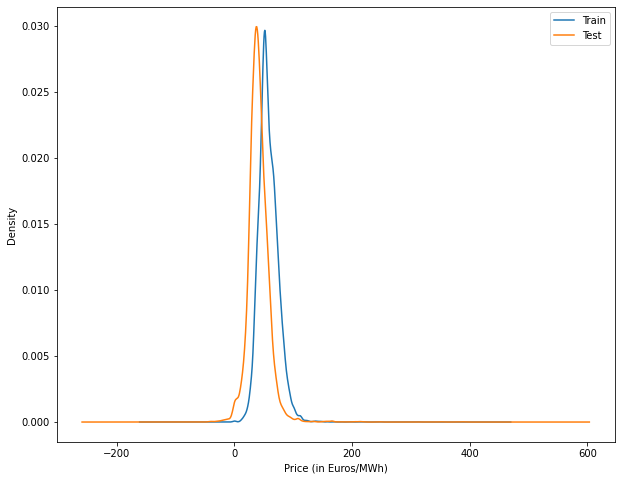

In [6]:
dataset_train["prices"].plot(kind='kde',label='Train')
dataset_test["prices"].plot(kind='kde',label='Test')
plt.xlabel("Price (in Euros/MWh)")
plt.legend()

## Emission test vs train distribution over the year

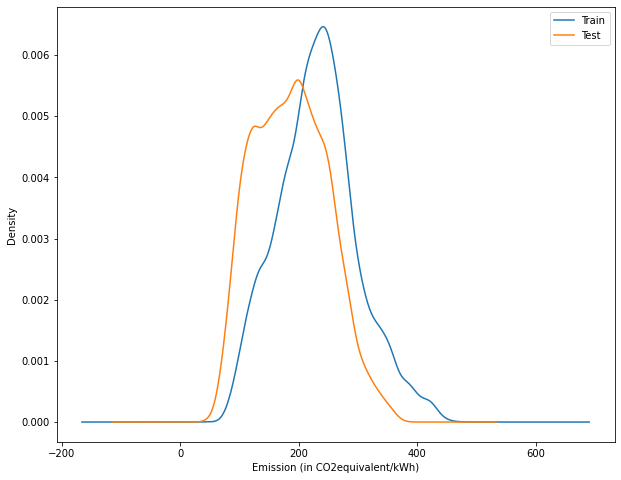

In [7]:
dataset_train["emissions"].plot(kind='kde',label='Train')
dataset_test["emissions"].plot(kind='kde',label='Test')
plt.xlabel("Emission (in CO2equivalent/kWh)")
plt.legend()

In [8]:
dataset_train.shape[0]//24, dataset_test.shape[0]//24

(657, 438)

In [9]:
days_train=[] 
for i in range(int(dataset_train.shape[0]/24)):
    days_train.append(dataset_train[i*24:(i+1)*24])    
    
for day in days_train:
    day.reset_index(drop=True, inplace=True)

In [10]:
days_test=[] 
for i in range(int(dataset_test.shape[0]/24)):
    days_test.append(dataset_test[i*24:(i+1)*24])    
    
for day in days_test:
    day.reset_index(drop=True, inplace=True)

In [11]:
from sklearn.preprocessing import MinMaxScaler
def preprocess_observation(observation):
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaler.fit(np.array(observation).reshape(-1,1))
    observation = scaler.transform(np.array(observation).reshape(-1,1))
    observation = observation.reshape(-1,).tolist()
    return observation

In [12]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats

def plot_ci_distribution(data: list, scaling: bool, col, minim, maxim):
    kde=[]
    for i,day in enumerate(data):
        if day[col].unique().shape[0] >1:
            if scaling:
                kde.append(scipy.stats.gaussian_kde(preprocess_observation(list(day[col]))))
            else:
                kde.append(scipy.stats.gaussian_kde(day[col]))    
    y=[]
    grid=np.linspace(minim, maxim,1000)
    for k in kde:
        y=y+list(k(grid))
    x=[]
    grid=np.linspace(minim, maxim,1000)
    for k in kde:
        x=x+list(grid)
    return x, y

# Emission Day-wise train vs test distribution

/home/rluser/anaconda3/envs/encortex/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/rluser/anaconda3/envs/encortex/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


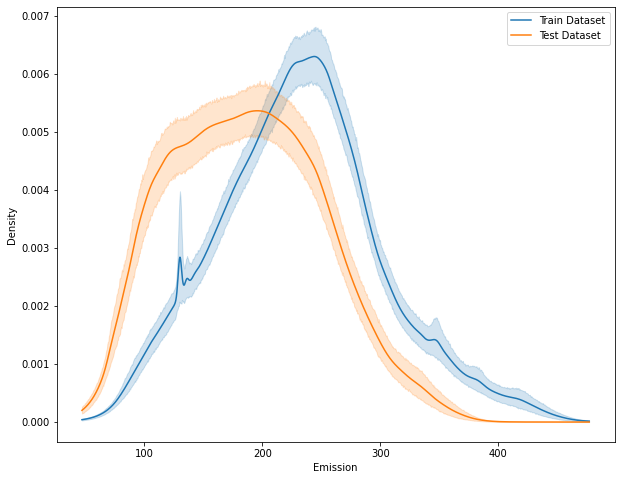

In [13]:
#training set
x,y = plot_ci_distribution(days_train, False, "emissions",47,477)
ax = sns.lineplot(x, y, label="Train Dataset")

#test set
x,y = plot_ci_distribution(days_test, False, "emissions", 47, 477)
ax = sns.lineplot(x, y, label="Test Dataset")

plt.xlabel("Emission")
plt.ylabel("Density")
plt.legend()
plt.show()

## Price Day-wise train vs test  distribution

/home/rluser/anaconda3/envs/encortex/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/rluser/anaconda3/envs/encortex/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


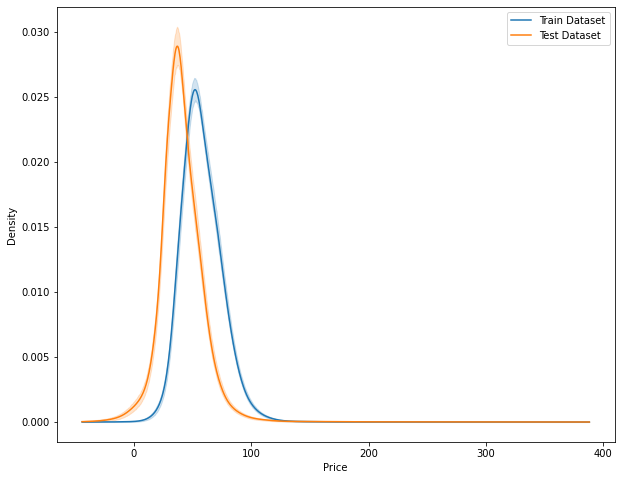

In [14]:
#training set
x,y = plot_ci_distribution(days_train, False, "prices", -44, 388)
ax = sns.lineplot(x, y, label="Train Dataset")

#test set
x,y = plot_ci_distribution(days_test, False, "prices", -44, 388)
ax = sns.lineplot(x, y, label="Test Dataset")

plt.xlabel("Price")
plt.ylabel("Density")
plt.legend()
plt.show()

## Scaled Distribution comparison of price and emission (Day-wise) for training set

/home/rluser/anaconda3/envs/encortex/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/rluser/anaconda3/envs/encortex/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


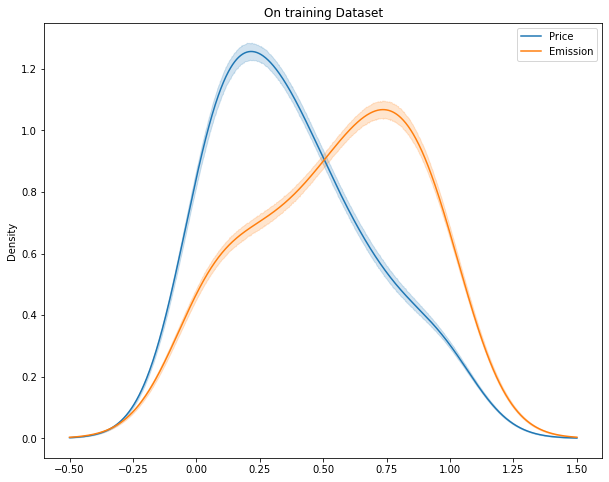

In [15]:
x,y = plot_ci_distribution(days_train, True, "prices", -0.5,1.5)
ax = sns.lineplot(x, y, label="Price")

x,y = plot_ci_distribution(days_train, True, "emissions", -0.5,1.5)
ax = sns.lineplot(x, y, label="Emission")

plt.ylabel("Density")
plt.legend()
plt.title("On training Dataset")
plt.show()

## Scaled Distribution comparison of price and emission (Day-wise) for test set

/home/rluser/anaconda3/envs/encortex/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/rluser/anaconda3/envs/encortex/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


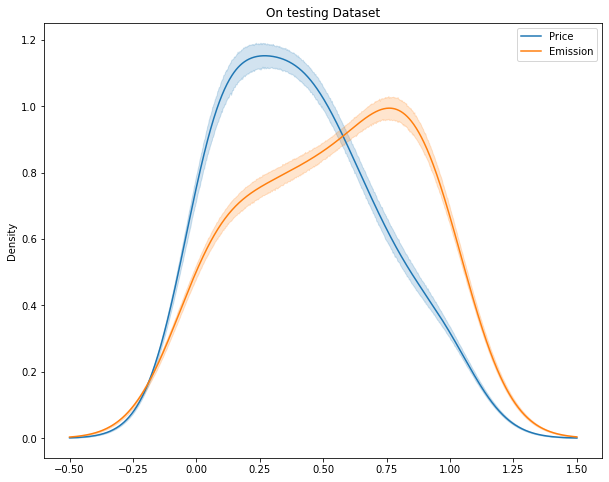

In [16]:
x,y = plot_ci_distribution(days_test, True, "prices", -0.5,1.5)
ax = sns.lineplot(x, y, label="Price")

x,y = plot_ci_distribution(days_test, True, "emissions", -0.5,1.5)
ax = sns.lineplot(x, y, label="Emission")

plt.ylabel("Density")
plt.legend()
plt.title("On testing Dataset")
plt.show()

In [17]:
dataset_train["timestamps"] = pd.to_datetime(dataset_train['timestamps'])
dataset_test["timestamps"] = pd.to_datetime(dataset_test["timestamps"])
dataset_train = dataset_train.set_index("timestamps")
dataset_test = dataset_test.set_index("timestamps")

In [18]:
657*24, dataset_train.shape[0], 439*24, dataset_test.shape[0]

(15768, 15768, 10536, 10535)

In [19]:
dataset_train["slots"]=list(range(0,24))*657
dataset_train["indices"]=list(range(0,dataset_train.shape[0]))

dataset_test["slots"]=list(range(0,24))*438+list(range(0,23))
dataset_test["indices"]=list(range(0,dataset_test.shape[0]))

# Visualization of Emission Data:

## On training set - > 

/home/rluser/anaconda3/envs/encortex/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Decision Slots in a day')

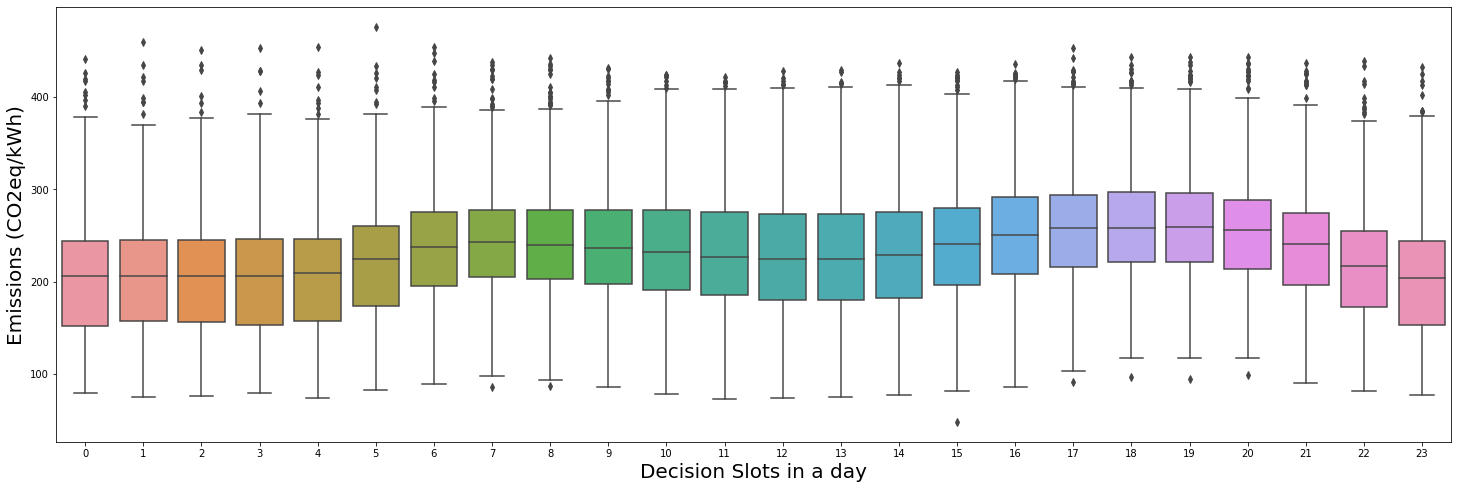

In [20]:
fig, ax = plt.subplots(figsize=(25, 8))
sns.boxplot(dataset_train["slots"], dataset_train["emissions"], ax=ax)
plt.ylabel("Emissions (CO2eq/kWh)", fontsize = 20)
# ax.set_xticks(np.append(np.asarray(list(range(0,24,20))), 287))
plt.xlabel("Decision Slots in a day", fontsize = 20)

/home/rluser/anaconda3/envs/encortex/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Timestamps')

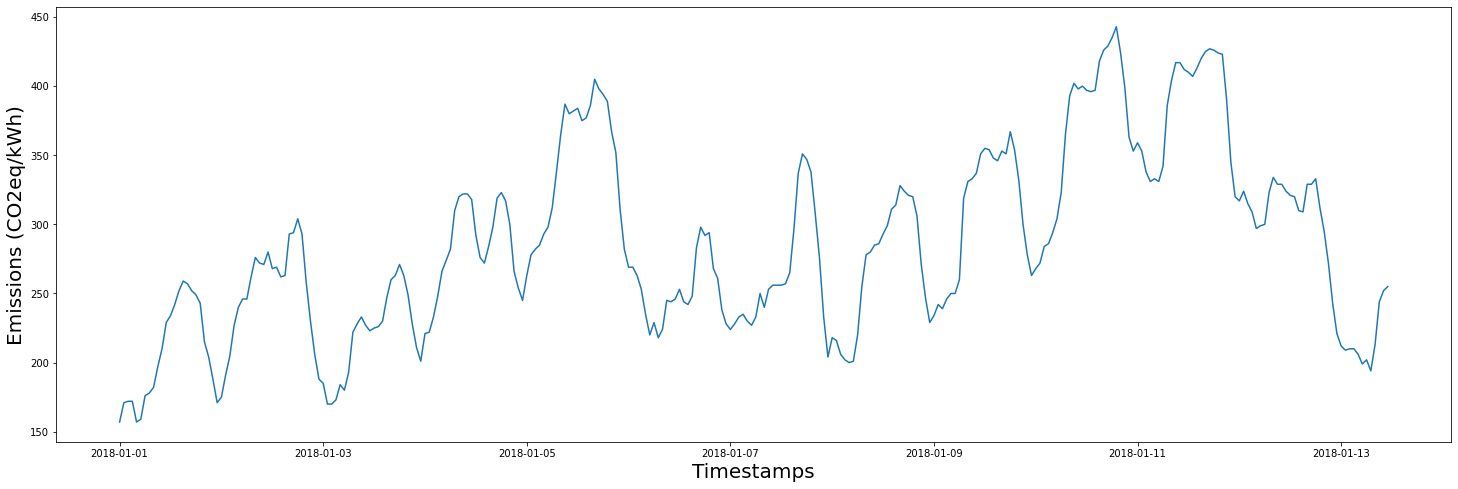

In [21]:
fig, ax = plt.subplots(figsize=(25, 8))
sns.lineplot(dataset_train.index[:300], dataset_train["emissions"][:300], ax=ax)
plt.ylabel("Emissions (CO2eq/kWh)", fontsize = 20)
plt.xlabel("Timestamps", fontsize = 20)

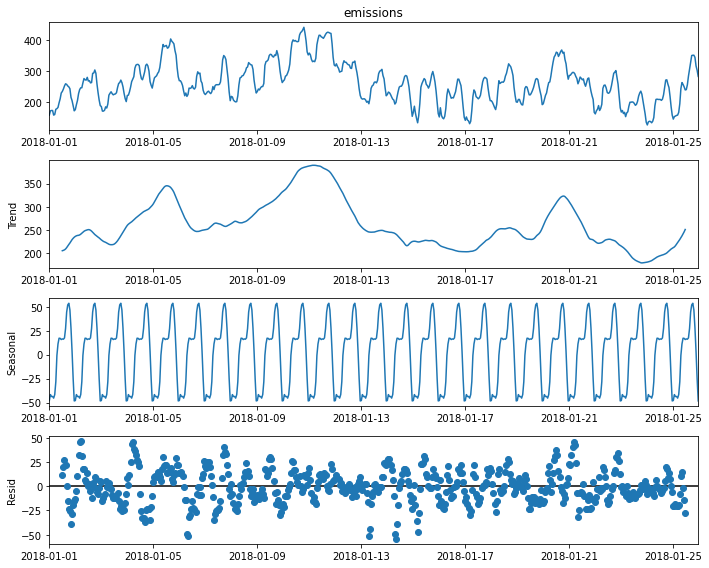

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose
# plt.figure(figsize = (15, 10))
result = seasonal_decompose(dataset_train["emissions"][:600], model='additive')
result.plot()
plt.show()

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 24)'>

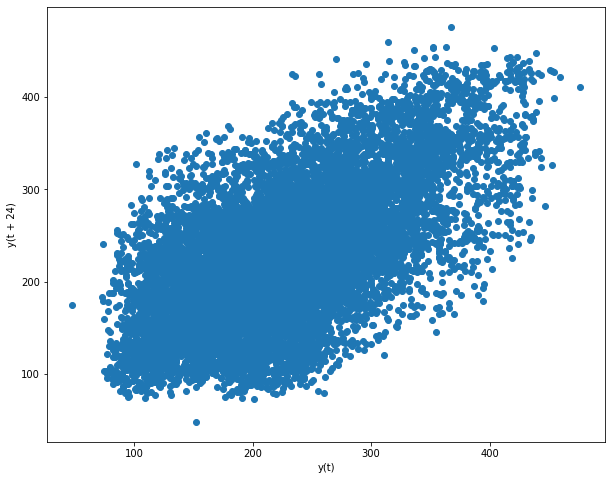

In [44]:
pd.plotting.lag_plot(dataset_train["emissions"], lag=1)

In [47]:
for i in range(1, 25):
    print(dataset_train['emissions'].autocorr(i))

0.9768938470745906
0.9302828439159577
0.8755943929885661
0.8211037374013183
0.7710942313683702
0.7274440215813087
0.6925860415654674
0.6688603769804982
0.6543471856629527
0.6434314628368759
0.6314453336389402
0.6164036178668977
0.5975268938813084
0.5754188015907381
0.5522193620821224
0.5326396784035051
0.5226526083211529
0.5248638556922671
0.5369151490312384
0.5564171498585194
0.5811997836418029
0.6072543185253808
0.6272200001534548
0.6299446576104742


<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

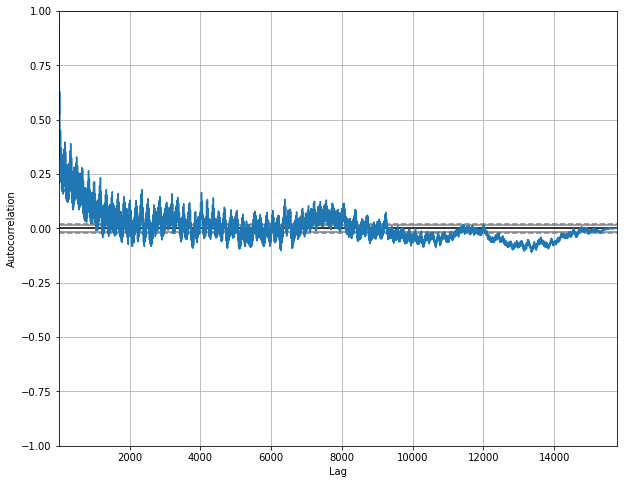

In [24]:
pd.plotting.autocorrelation_plot(dataset_train["emissions"])

/home/rluser/anaconda3/envs/encortex/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


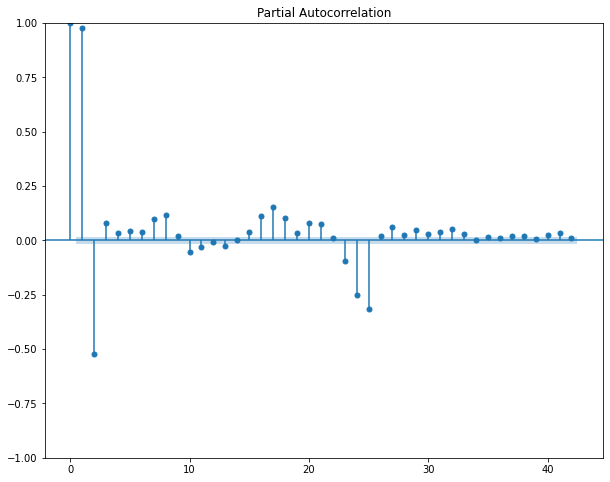

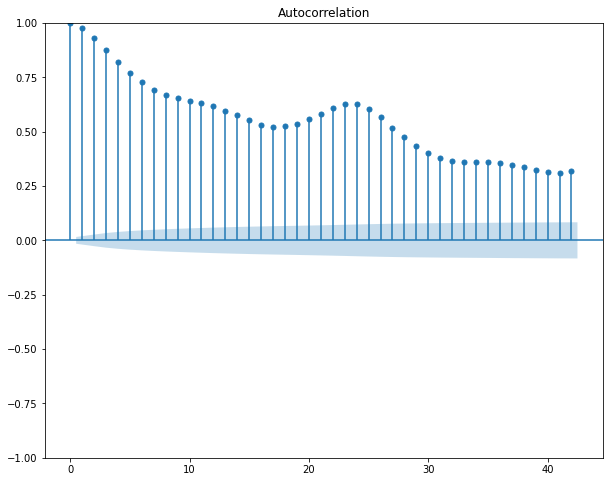

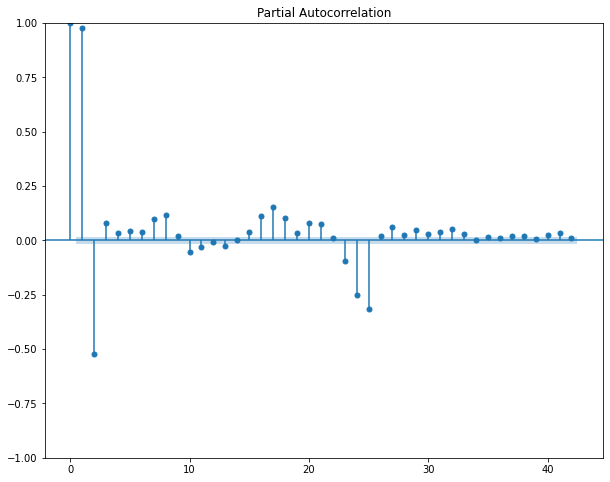

In [25]:
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf
plot_acf(dataset_train["emissions"])
plot_pacf(dataset_train["emissions"])

## On test set ->

/home/rluser/anaconda3/envs/encortex/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Decision Slots in a day')

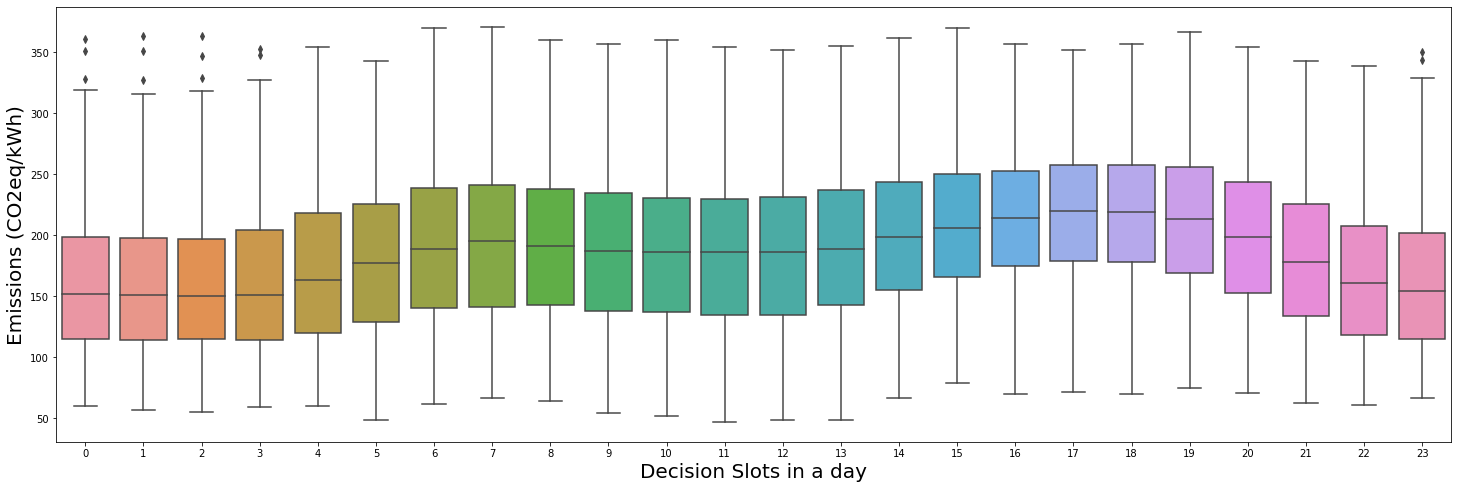

In [26]:
fig, ax = plt.subplots(figsize=(25, 8))
sns.boxplot(dataset_test["slots"], dataset_test["emissions"], ax=ax)
plt.ylabel("Emissions (CO2eq/kWh)", fontsize = 20)
# ax.set_xticks(np.append(np.asarray(list(range(0,24,20))), 287))
plt.xlabel("Decision Slots in a day", fontsize = 20)

/home/rluser/anaconda3/envs/encortex/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Timestamps')

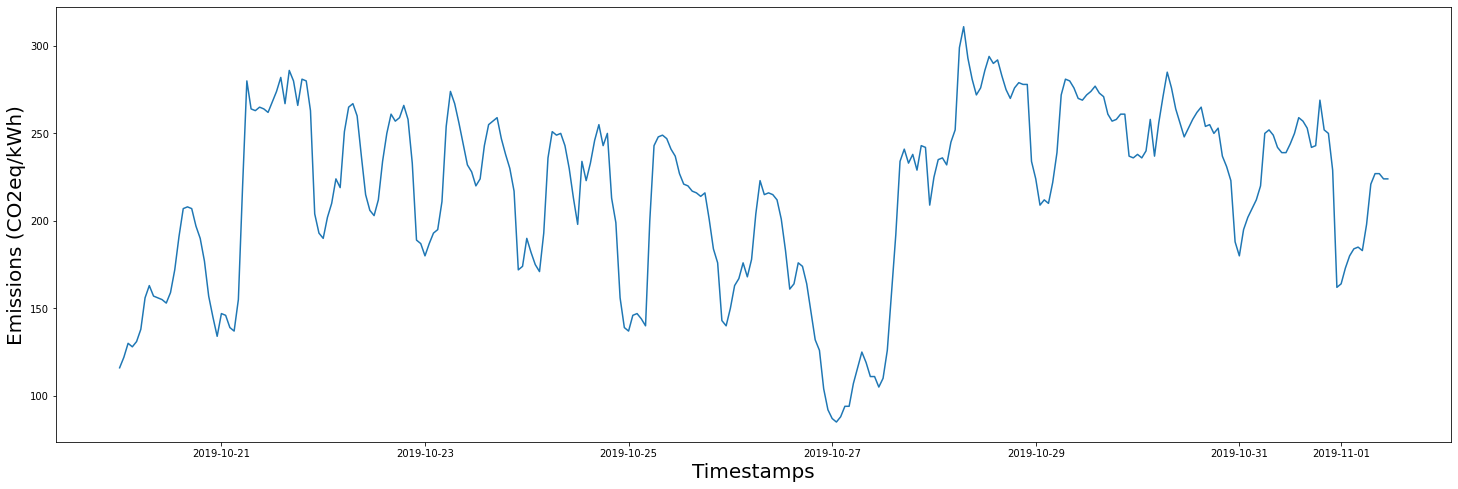

In [27]:
fig, ax = plt.subplots(figsize=(25, 8))
sns.lineplot(dataset_test.index[:300], dataset_test["emissions"][:300], ax=ax)
plt.ylabel("Emissions (CO2eq/kWh)", fontsize = 20)
plt.xlabel("Timestamps", fontsize = 20)

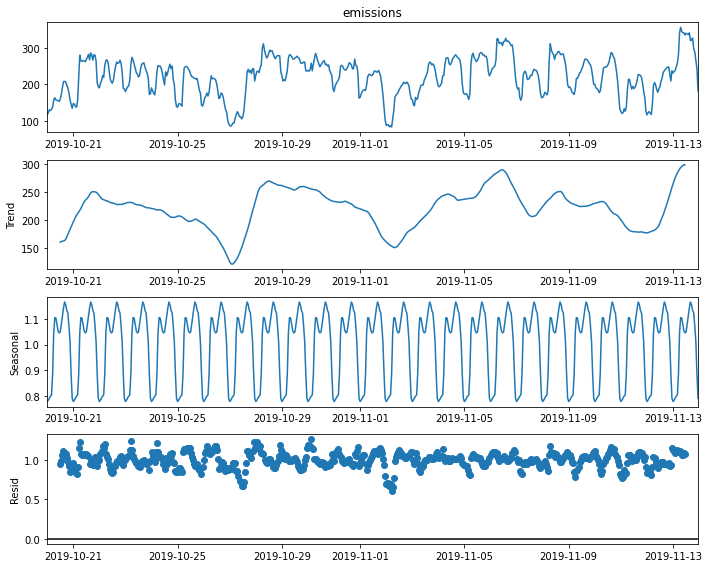

In [49]:
# plt.figure(figsize = (15, 10))
result = seasonal_decompose(dataset_test["emissions"][:600], model='multiplicative')
result.plot()
plt.show()

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 24)'>

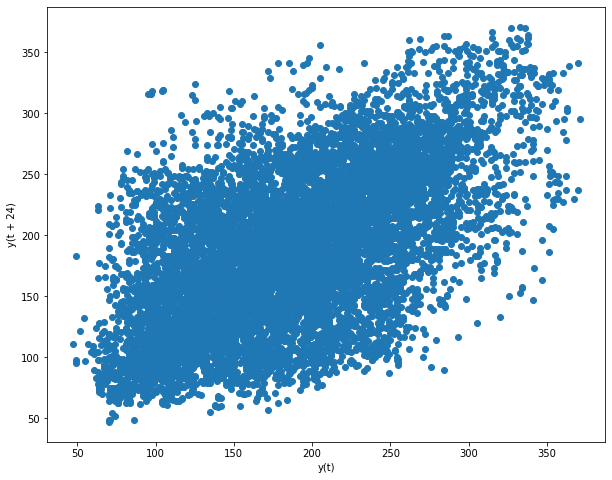

Bad pipe message: %s [b'\x92\x8a\x0c\xbc6\xd4\xc3\xce/\x04\xc2p\xc1\xa4%\xac\x0b\x03 ']
Bad pipe message: %s [b'z\x02t\xffA\x1d\xc6\x9d<\xde\x91\xf0\x7f\xa4Y\x81\xd1: !\xd7X2\xefd\x7f\xe5\xc94\xa6,\x1f\x9e\'\n=\'\xca\x08\xf9o~\x80"\xff\xaf\xc9%\x02f\x9f\x00\x08\x13\x02\x13\x03\x13\x01\x00\xff\x01\x00\x00\x8f\x00\x00\x00\x0e\x00\x0c\x00\x00\t127.0.0.1\x00\x0b\x00\x04\x03\x00\x01\x02\x00\n\x00\x0c\x00\n\x00\x1d\x00\x17\x00\x1e\x00\x19\x00\x18']
Bad pipe message: %s [b'[S\xd9\x95\x92\x14\xd0D\xb5\xb6\xf2\xf7\x06Mv\xe6s\x9d\x00\x00|\xc0,\xc00\x00\xa3\x00\x9f\xcc\xa9\xcc\xa8\xcc\xaa\xc0\xaf\xc0\xad\xc0\xa3\xc0\x9f\xc0]\xc0a\xc0W\xc0S\xc0+\xc0/\x00\xa2\x00\x9e\xc0\xae\xc0\xac\xc0\xa2\xc0\x9e\xc0\\\xc0`\xc0', b"R\xc0$\xc0(\x00k\x00j\xc0#\xc0'\x00g\x00@\xc0\n\xc0\x14\x009\x008\xc0\t\xc0\x13\x003\x002\x00\x9d\xc0\xa1\xc0\x9d\xc0Q\x00\x9c\xc0\xa0\xc0\x9c\xc0P\x00=\x00<\x005\x00/\x00\x9a\x00\x99\xc0\x07\xc0\x11\x00\x96\x00\x05\x00\xff\x01\x00\x00j\x00\x00\x00\x0e\x00\x0c\x00\x00\t1"]
Bad pipe mes

In [50]:
pd.plotting.lag_plot(dataset_test["emissions"], lag=24)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

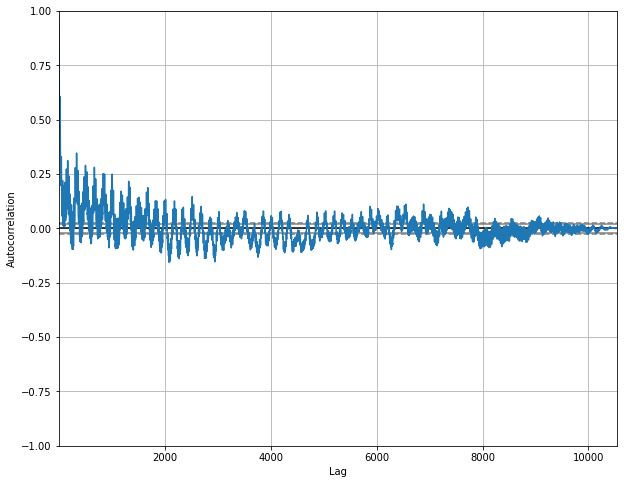

In [30]:
pd.plotting.autocorrelation_plot(dataset_test["emissions"])

/home/rluser/anaconda3/envs/encortex/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


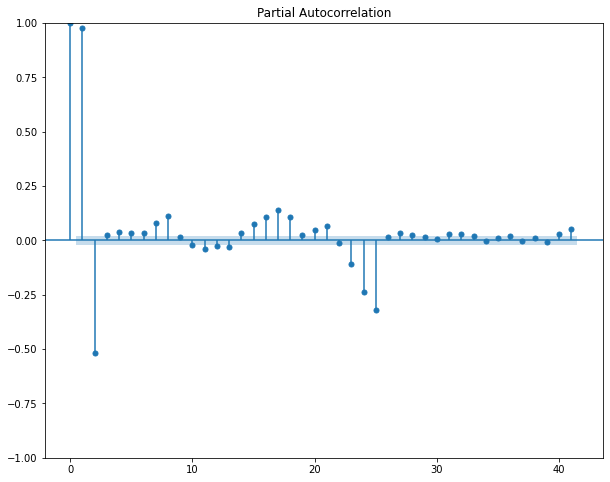

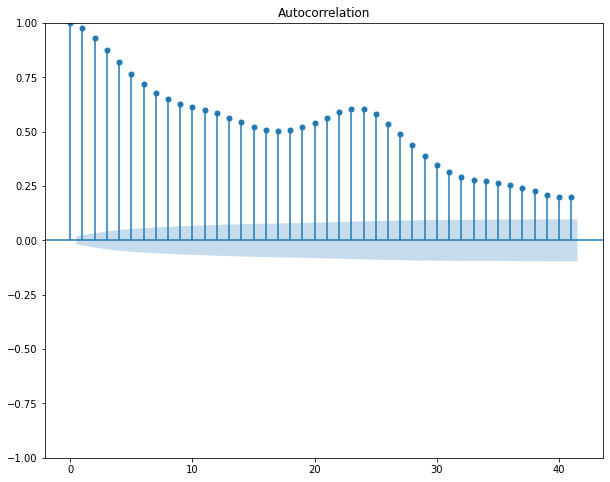

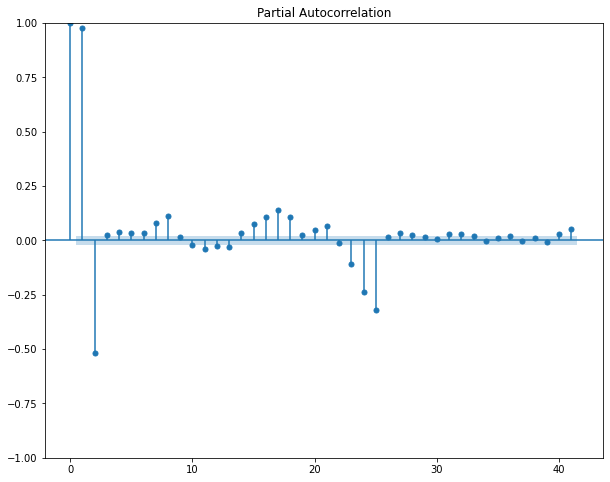

In [31]:
plot_acf(dataset_test["emissions"])
plot_pacf(dataset_test["emissions"])

# Visualization of Price Data:

## On Training Set ->

/home/rluser/anaconda3/envs/encortex/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Decision Slots in a day')

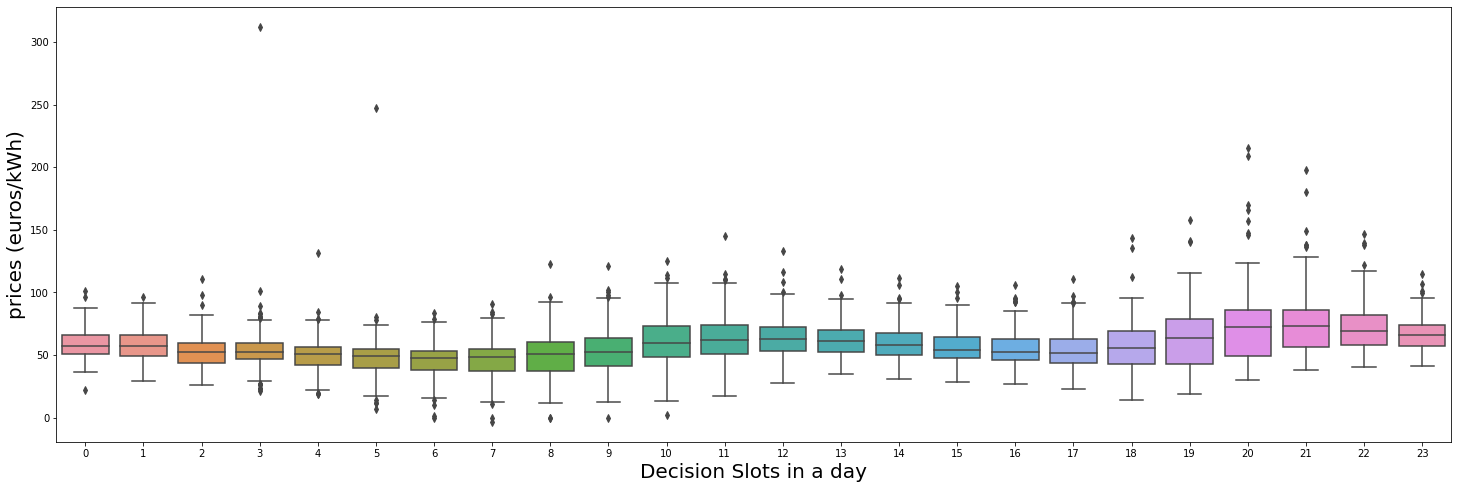

In [32]:
fig, ax = plt.subplots(figsize=(25, 8))
sns.boxplot(dataset_train["slots"], dataset_train["prices"], ax=ax)
plt.ylabel("prices (euros/kWh)", fontsize = 20)
# ax.set_xticks(np.append(np.asarray(list(range(0,24,20))), 287))
plt.xlabel("Decision Slots in a day", fontsize = 20)

/home/rluser/anaconda3/envs/encortex/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Timestamps')

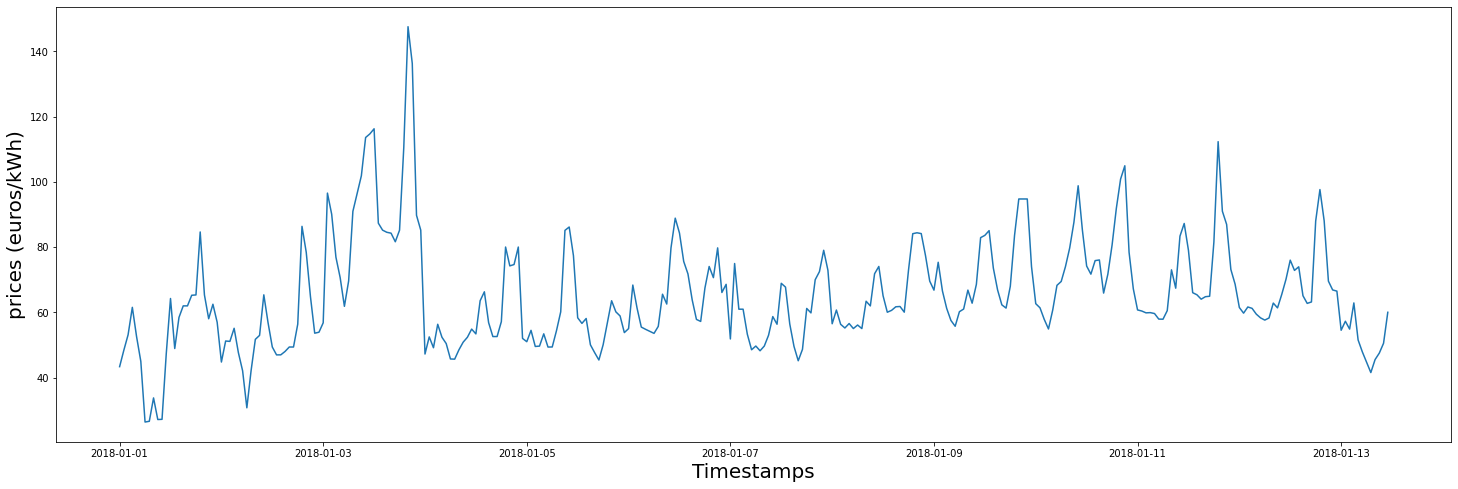

In [33]:
fig, ax = plt.subplots(figsize=(25, 8))
sns.lineplot(dataset_train.index[:300], dataset_train["prices"][:300], ax=ax)
plt.ylabel("prices (euros/kWh)", fontsize = 20)
plt.xlabel("Timestamps", fontsize = 20)

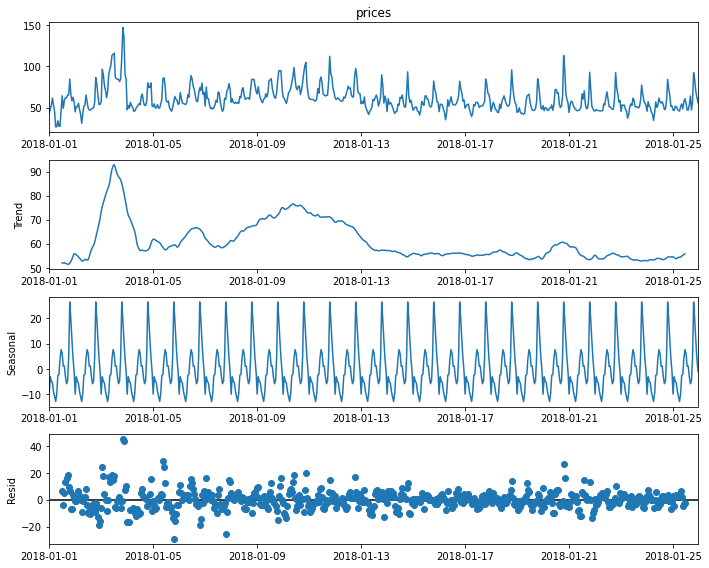

In [34]:
# plt.figure(figsize = (15, 10))
result = seasonal_decompose(dataset_train["prices"][:600], model='additive')
result.plot()
plt.show()

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

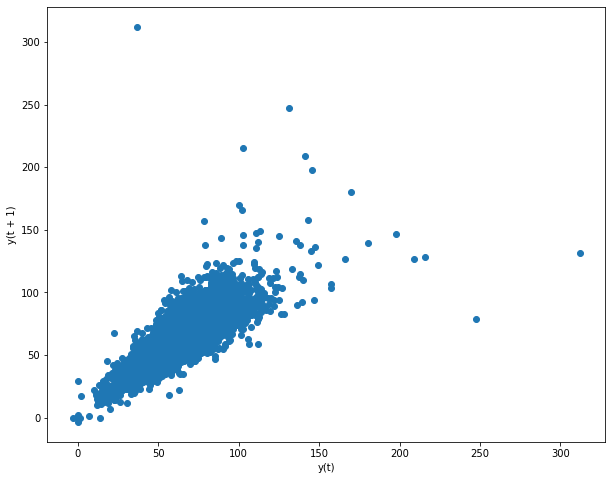

In [35]:
pd.plotting.lag_plot(dataset_train["prices"], lag=1)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

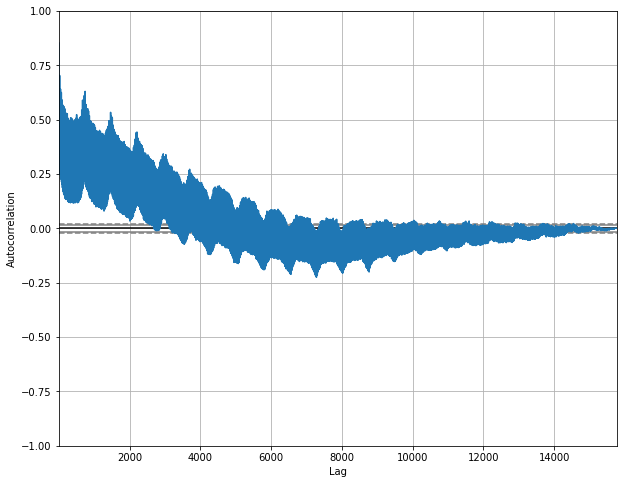

In [36]:
pd.plotting.autocorrelation_plot(dataset_train["prices"])

/home/rluser/anaconda3/envs/encortex/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


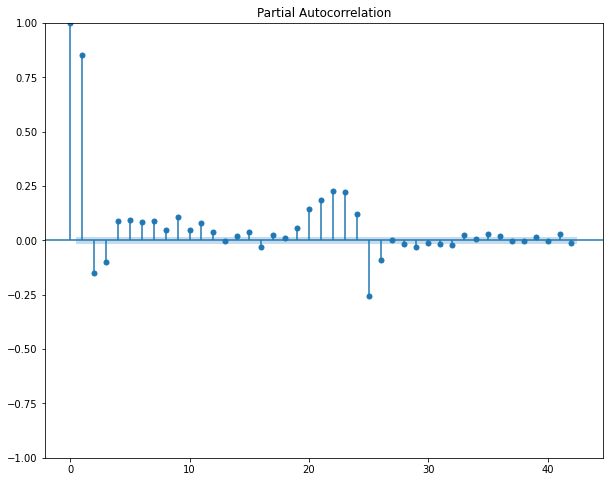

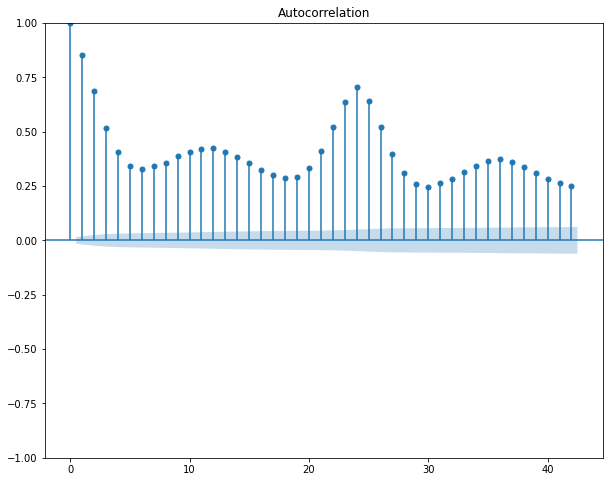

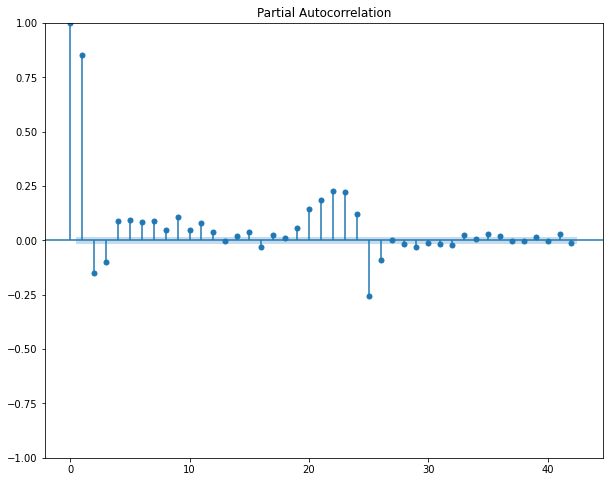

In [37]:
plot_acf(dataset_train["prices"])
plot_pacf(dataset_train["prices"])

## On Test set ->

/home/rluser/anaconda3/envs/encortex/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Decision Slots in a day')

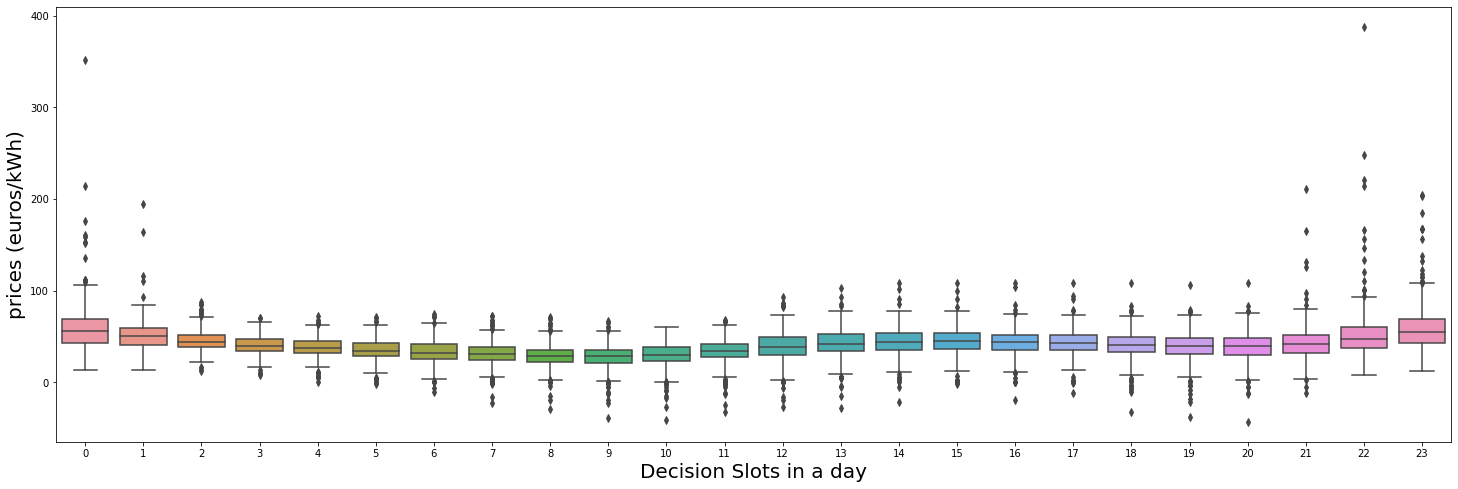

In [38]:
fig, ax = plt.subplots(figsize=(25, 8))
sns.boxplot(dataset_test["slots"], dataset_test["prices"], ax=ax)
plt.ylabel("prices (euros/kWh)", fontsize = 20)
# ax.set_xticks(np.append(np.asarray(list(range(0,24,20))), 287))
plt.xlabel("Decision Slots in a day", fontsize = 20)

/home/rluser/anaconda3/envs/encortex/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Timestamps')

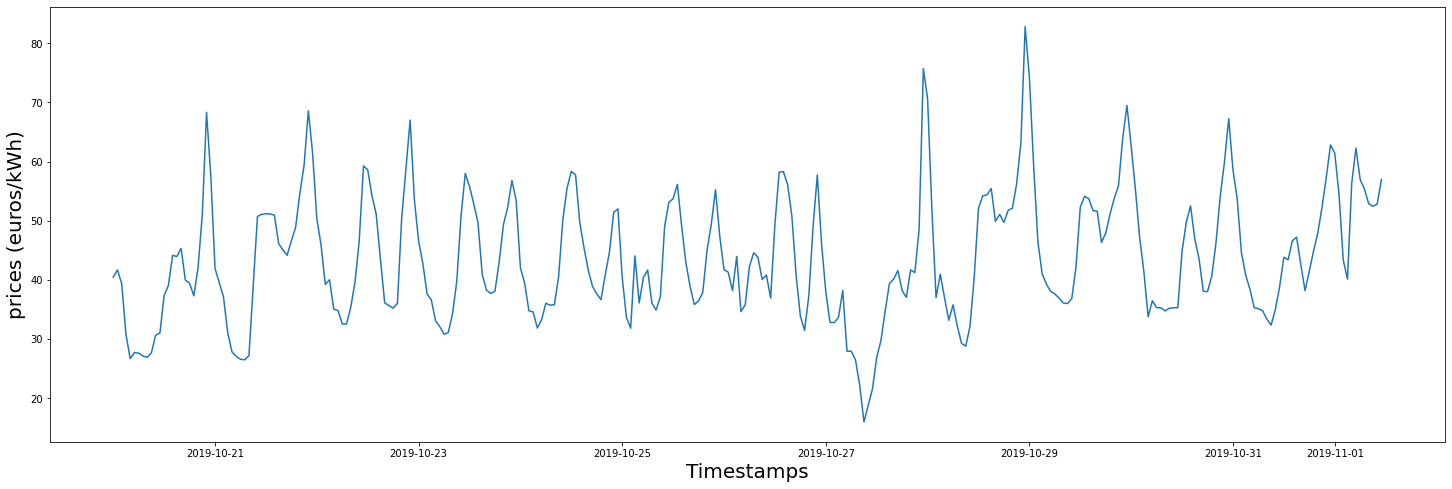

In [39]:
fig, ax = plt.subplots(figsize=(25, 8))
sns.lineplot(dataset_test.index[:300], dataset_test["prices"][:300], ax=ax)
plt.ylabel("prices (euros/kWh)", fontsize = 20)
plt.xlabel("Timestamps", fontsize = 20)

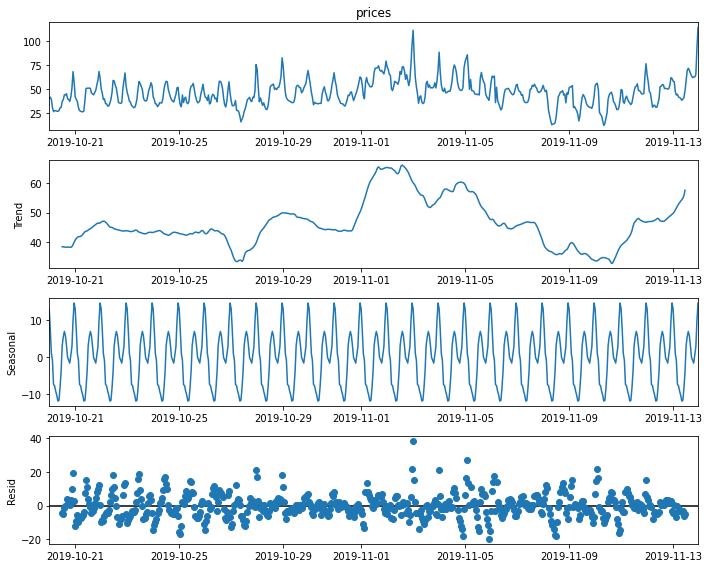

In [40]:
# plt.figure(figsize = (15, 10))
result = seasonal_decompose(dataset_test["prices"][:600], model='additive')
result.plot()
plt.show()

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 24)'>

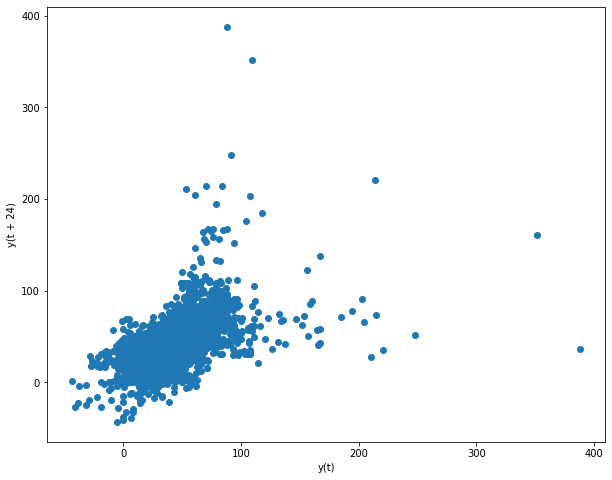

In [48]:
pd.plotting.lag_plot(dataset_test["prices"], lag=24)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

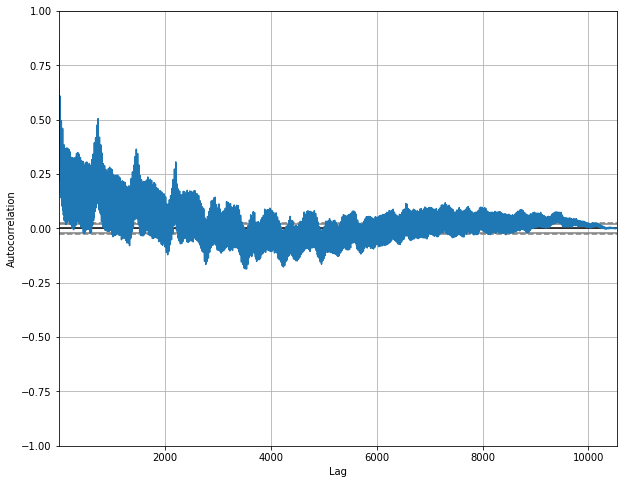

In [42]:
pd.plotting.autocorrelation_plot(dataset_test["prices"])

/home/rluser/anaconda3/envs/encortex/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


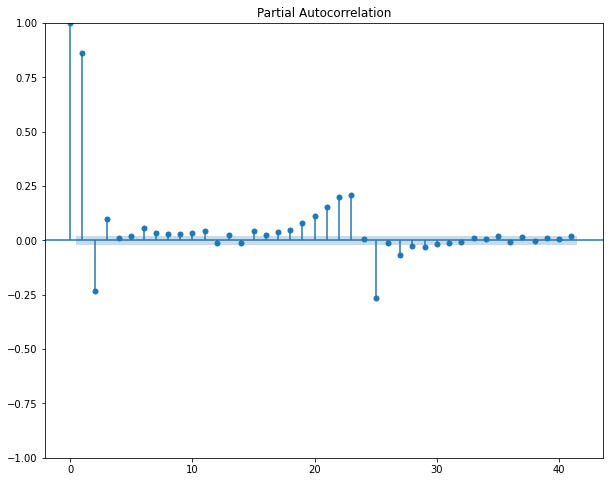

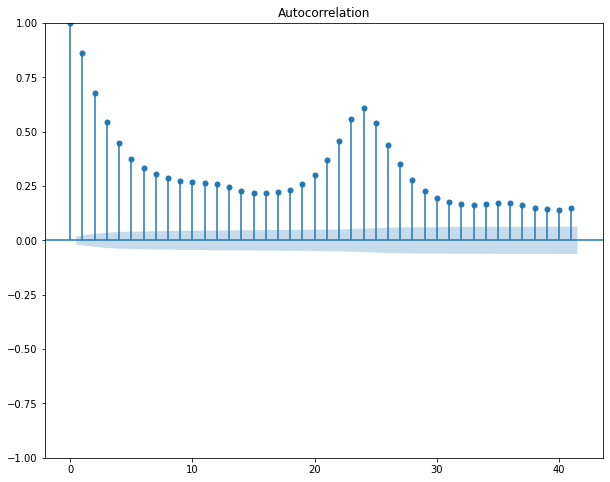

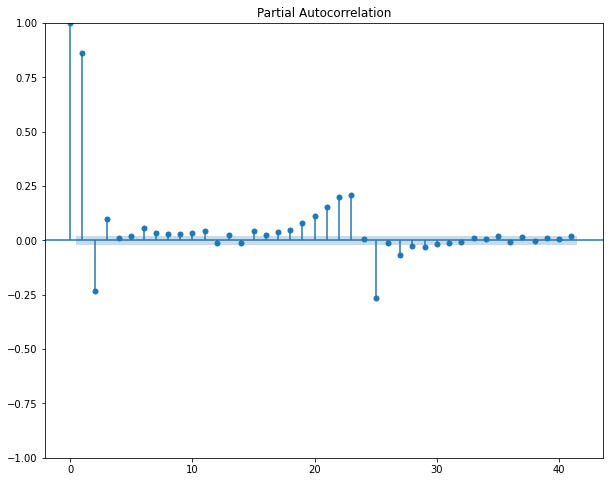

In [43]:
plot_acf(dataset_test["prices"])
plot_pacf(dataset_test["prices"])